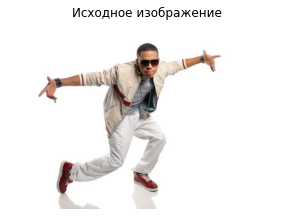

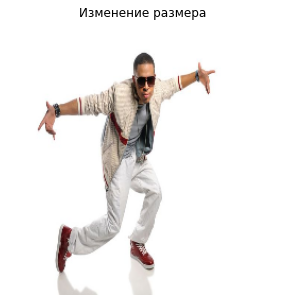

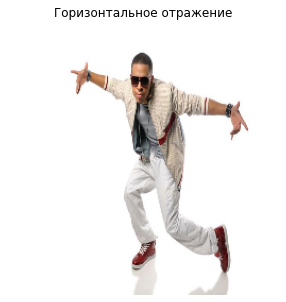

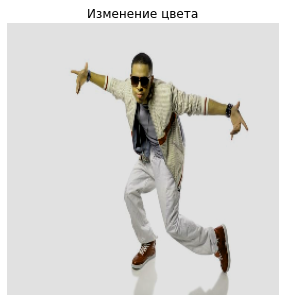

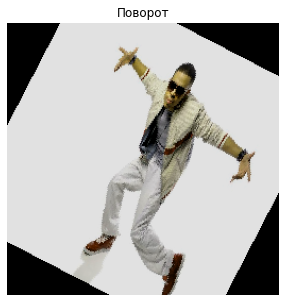

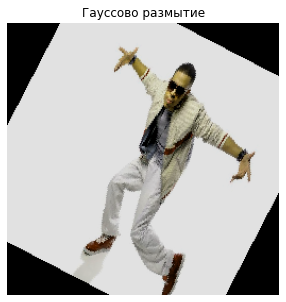

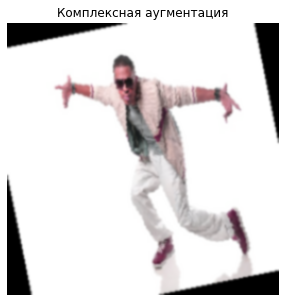

In [5]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from torchvision.io import read_image, ImageReadMode

# Загрузка изображения
img_path = "sample.jpg"
original_img = read_image(img_path, mode=ImageReadMode.RGB).float() / 255.0

# Утилита для отображения изображения
def display(img_tensor, title):
    img = img_tensor.permute(1, 2, 0)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Показываем исходное изображение
display(original_img, "Исходное изображение")

# Список трансформаций и их названия
transformations = [
    ("Изменение размера", T.Resize((256, 256))),
    ("Горизонтальное отражение", T.RandomHorizontalFlip(p=1.0)),
    ("Изменение цвета", T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)),
    ("Поворот", T.RandomRotation(degrees=30)),
    ("Гауссово размытие", T.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)))
]

# Применение трансформаций поочерёдно
img = original_img.clone()
for label, aug in transformations:
    img = aug(img)
    display(img, label)

# Комбинированная трансформация
combined_transform = T.Compose([
    T.Resize((256, 256)),
    T.RandomHorizontalFlip(p=1.0),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    T.RandomRotation(degrees=30),
    T.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0))
])

# Применяем весь пайплайн
final_img = combined_transform(original_img)
display(final_img, "Комплексная аугментация")


В рамках данного задания были применены и протестированы 5 различных методов аугментации изображений с использованием библиотеки torchvision.transforms. Ниже приведены краткие наблюдения по каждой из них:

Изменение размера (Resize)
Позволяет привести изображение к единому размеру, что важно для подачи в нейросеть. Пропорции могут исказиться, если не использовать сохранение сторон.

Горизонтальное отражение (RandomHorizontalFlip)
Полезно для повышения устойчивости модели к ориентации объектов. Особенно эффективно при работе с изображениями, в которых объекты симметричны или могут появляться в разных положениях.

Изменение цветовых характеристик (ColorJitter)
Симулирует различные условия освещения, насыщенности и оттенков. Улучшает генерализацию модели при обучении на разнообразных данных.

Поворот (RandomRotation)
Добавляет вариативность по углу зрения, что особенно актуально для объектов, не жёстко ориентированных в пространстве.

Гауссово размытие (GaussianBlur)
Делает модель менее чувствительной к деталям и шуму, помогает устойчивости к фоновому "мусору" или низкому качеству входных данных.

